   Unnamed: 0  Seq       Dur   RunTime      Mean       Sum       Min  \
0           0  1.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1           1  2.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2           2  3.0  4.998020  4.998020  4.998020  4.998020  4.998020   
3           3  4.0  4.998037  4.998037  4.998037  4.998037  4.998037   
4           4  5.0  4.999453  4.999453  4.999453  4.999453  4.999453   

        Max Proto  sTos  ...  sVid dVid SrcTCPBase  DstTCPBase  TcpRtt  \
0  0.000000  icmp   0.0  ...   NaN  NaN        NaN         NaN     0.0   
1  0.000000  icmp   0.0  ...   NaN  NaN        NaN         NaN     0.0   
2  4.998020   udp   0.0  ...   NaN  NaN        NaN         NaN     0.0   
3  4.998037   udp   0.0  ...   NaN  NaN        NaN         NaN     0.0   
4  4.999453   udp   0.0  ...   NaN  NaN        NaN         NaN     0.0   

   SynAck  AckDat   Label  Attack Type  Attack Tool  
0     0.0     0.0  Benign       Benign       Benign  
1     0.0     

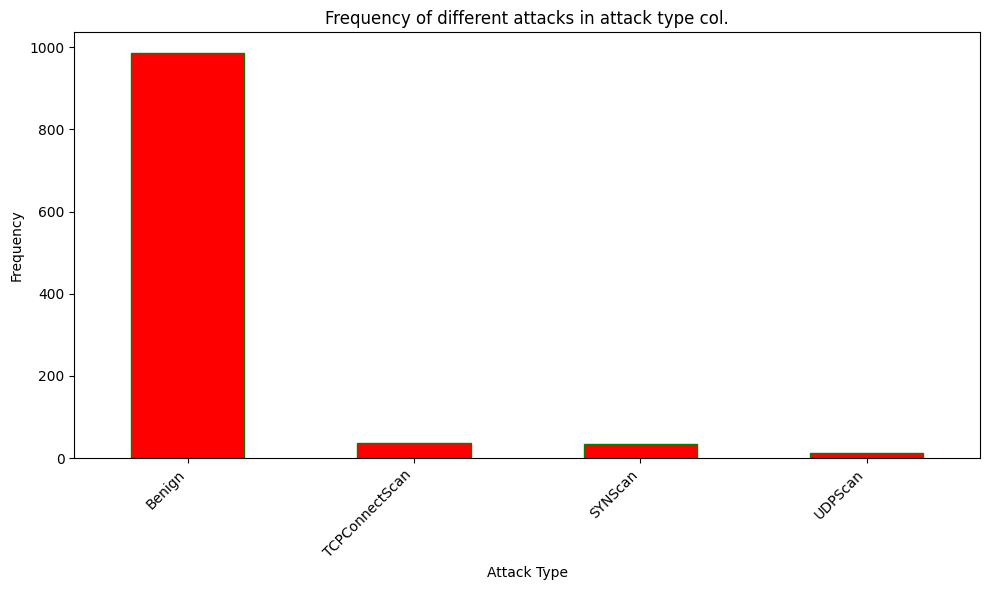

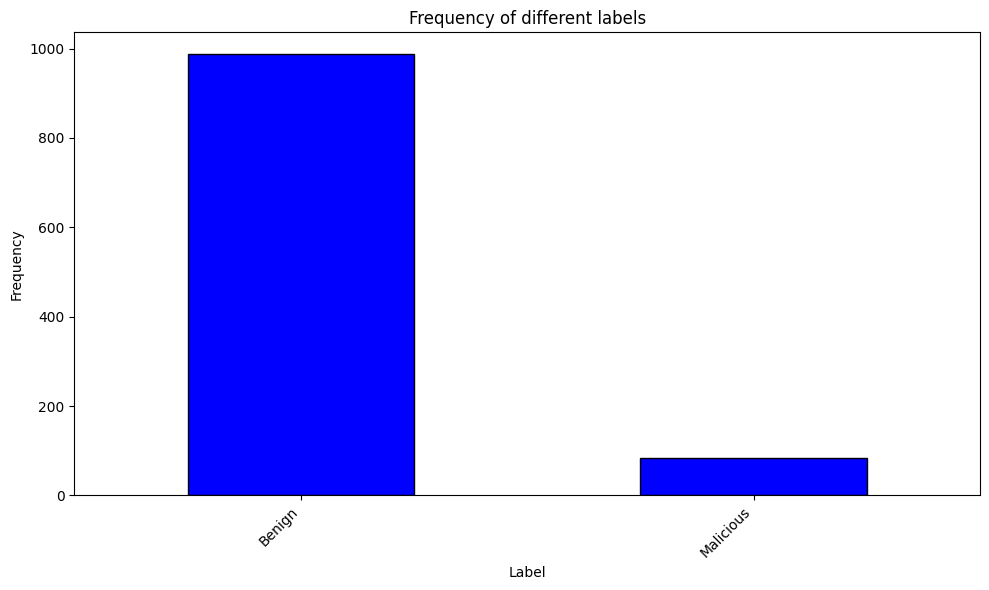

Epoch 1/350
11/11 [==============================] - 2s 32ms/step - loss: 23345.5820 - accuracy: 0.7573 - val_loss: 3861.3662 - val_accuracy: 0.9070
Epoch 2/350
11/11 [==============================] - 0s 14ms/step - loss: 5734.4341 - accuracy: 0.9225 - val_loss: 5937.6133 - val_accuracy: 0.9070
Epoch 3/350
11/11 [==============================] - 0s 12ms/step - loss: 6803.8091 - accuracy: 0.9225 - val_loss: 3058.6824 - val_accuracy: 0.9070
Epoch 4/350
11/11 [==============================] - 0s 13ms/step - loss: 6077.2905 - accuracy: 0.8743 - val_loss: 4280.7114 - val_accuracy: 0.9070
Epoch 5/350
11/11 [==============================] - 0s 12ms/step - loss: 5230.8843 - accuracy: 0.9225 - val_loss: 2410.7361 - val_accuracy: 0.9070
Epoch 6/350
11/11 [==============================] - 0s 14ms/step - loss: 3454.6545 - accuracy: 0.8874 - val_loss: 2233.7405 - val_accuracy: 0.9070
Epoch 7/350
11/11 [==============================] - 0s 12ms/step - loss: 2271.5398 - accuracy: 0.8918 - val_lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Loading the dataset:-
gnidd = pd.read_csv('/content/sample_data/5gnidd.csv')
print(gnidd.head())
print(gnidd.describe())

# Dropping unnecessary columns:-
unnecessary_columns = ['Unnamed: 0', 'RunTime', 'Min', 'Max', 'sTos', 'dTos',
                       'sDSb', 'dDSb', 'sHops', 'dHops', 'SrcWin',
                       'DstWin', 'sVid', 'dVid', 'SrcTCPBase', 'DstTCPBase',
                       'TcpRtt', 'SynAck', 'AckDat']

gnidd = gnidd.drop(unnecessary_columns, axis=1)

# Dropping missing values (NaNs):-
gnidd = gnidd.dropna()

# Checking for any duplicate values:-
print(gnidd.duplicated().sum())
# dropping any duplicate values:-
gnidd = gnidd.drop_duplicates()
print(gnidd.shape)
print(gnidd.head())

# Separating feature cols (X) and label cols (Y):-
X = gnidd.drop(['Label', 'Attack Type', 'Attack Tool'], axis=1)
Y = gnidd['Attack Type']

# Converting categorical columns to numerical using one-hot encoding:-
categorical_cols = ['Proto', 'Cause', 'State']
X = pd.get_dummies(X, columns=categorical_cols)

# Feature Scaling:-
columns_to_scale = ['Seq','Dur','Mean','Sum','TotPkts','SrcPkts','DstPkts',
                    'TotBytes','SrcBytes','DstBytes','Offset','sMeanPktSz',
                    'dMeanPktSz','Load','SrcLoad','DstLoad','Loss','SrcLoss',
                    'DstLoss','pLoss','Rate','SrcRate','DstRate','SrcGap','DstGap',
                    'sTtl','dTtl'
                    ]
numeric_data = gnidd[columns_to_scale]
# Min Max Scaling:-
min_max_scaling = MinMaxScaler()
# Applying Z-Score Normalization:-
standard_scaling = StandardScaler()
standard_scaled_data = standard_scaling.fit_transform(numeric_data)
standard_scaled_data = pd.DataFrame(standard_scaled_data, columns = columns_to_scale)


# Converting dataframe to a numpy array:-
X = X.to_numpy()

# Converting labels to numerical values:-
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Converting target labels to one-hot encoding:-
numerical_classes = len(label_encoder.classes_)
Y = tf.keras.utils.to_categorical(Y, numerical_classes)

# Understanding the frequencies of attacks:-
attack_types_counts = gnidd['Attack Type'].value_counts()
plt.figure(figsize = (10, 6))
attack_types_counts.plot(kind = 'bar', color = 'red', edgecolor = 'green')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.title('Frequency of different attacks in attack type col.')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

# Understanding the frequencies of labels:-
attack_types_counts = gnidd['Label'].value_counts()
plt.figure(figsize = (10, 6))
attack_types_counts.plot(kind = 'bar', color = 'blue', edgecolor = 'black')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of different labels')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

# Splitting data into training and testing sets:-
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)

# Reshaping input data for CNN (assuming the dataset has 1D sequences):-
input_shape = (X_train.shape[1], 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling1D(pool_size=3),
    tf.keras.layers.Conv1D(128, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(numerical_classes, activation='softmax')
])

# Model Compilation:-
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Trainng our Model:-
epochs = 350
batch_size = 64
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Model Evaluation:-
loss, accuracy = model.evaluate(X_test,Y_test, batch_size=batch_size)
print(f'Test loss is: {loss:.4f}, Test accuracy is: {accuracy:.4f}')

# Making predictions:-
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(Y_test, axis=1)
print(y_pred_classes)
print()
print(y_test_classes)

# Convert predicted labels back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test_classes)
print('testing labels are: ',y_test_labels)
print()
print('predicted labels are: ',y_pred_labels)
print()

# Calculating accuracy:-
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy is: {accuracy:.4f}')

# Generating classification report:-
classification_rep = classification_report(y_test_labels, y_pred_labels)
print('Classification Report is:')
print(classification_rep)

# Generating confusion matrix:-
confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)
print('Confusion Matrix:')
print(confusion_mat)
